# Testing the mesh with dirichlet BC

In [11]:
from dolfin import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as tri
import numpy as np

In [12]:
mesh = Mesh()
with XDMFFile(MPI.comm_world, "mesh/mesh_with_bcs.xdmf") as file:
    file.read(mesh)

boundary_markers = MeshFunction('size_t', mesh, mesh.topology().dim()-1, 0)
with XDMFFile(MPI.comm_world, "mesh/boundary_markers.xdmf") as file:
    file.read(boundary_markers)

In [13]:
# Define subdomain markers and the corresponding subdomains for materials
materials = MeshFunction('size_t', mesh, mesh.topology().dim(), 0)
# Define the material properties as functions, assuming 1 everywhere as you said
k = Constant(1)  # Thermal conductivity

In [14]:
# Define function space
V = FunctionSpace(mesh, 'P', 1)

# Define boundary conditions
u_D_top_tile = Constant(1.0)  # Example value for top tile
u_D_pipeface = Constant(-1.0)  # Example value for pipeface

In [15]:
bc_top_tile = DirichletBC(V, u_D_top_tile, boundary_markers, 1)  # '1' should match the top tile marker
bc_pipeface = DirichletBC(V, u_D_pipeface, boundary_markers, 2)  # '2' should match the pipeface marker

# Collect boundary conditions
bcs = [bc_top_tile, bc_pipeface]


In [16]:
# Define variational problem for Laplace equation
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)  # Assuming zero source term for Laplace's equation
a = k * dot(grad(u), grad(v)) * dx
L = f * v * dx

In [17]:
# Compute solution
u = Function(V)
solve(a == L, u, bcs)

Solving linear variational problem.


In [18]:
# Save solution to file
with XDMFFile(MPI.comm_world, "output/solution.xdmf") as file:
    file.write(u)

In [19]:
# # To compute and write the gradient, you need to project it to a VectorFunctionSpace
# V_g = VectorFunctionSpace(mesh, 'P', 1)
# grad_u = project(grad(u), V_g)

# with XDMFFile(MPI.comm_world, "output/temperature_gradient.xdmf") as file:
#     file.write(grad_u)


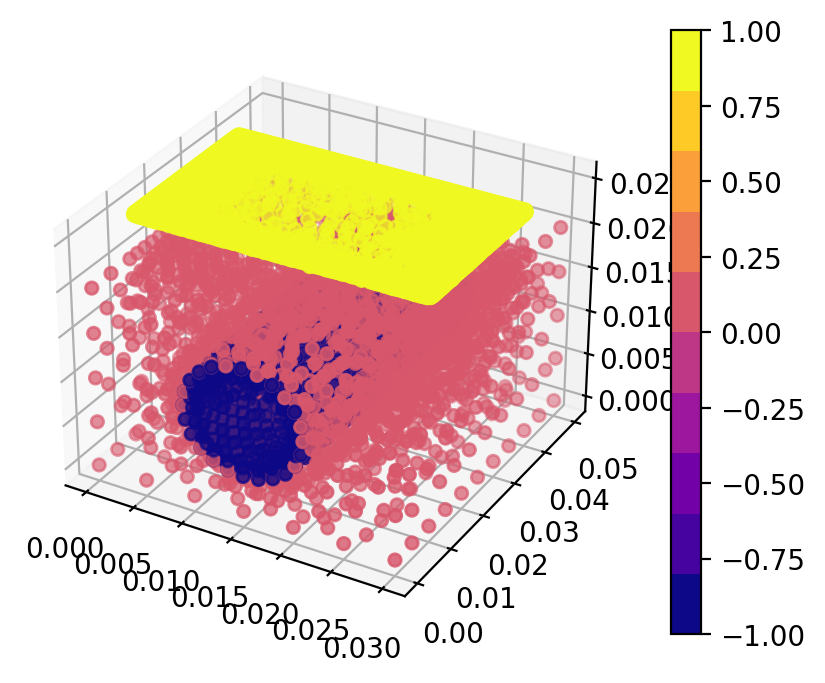

In [20]:
fig =plt.figure(dpi=200)
sc = plot(u,cmap=plt.get_cmap('plasma', 10))
fig.colorbar(sc)
plt.savefig('output/solution.png', dpi=500, bbox_inches='tight')